**ogs@jupyter-lab: C process: Diffusion Reference Case**

<table><tr>
<td> <img src="../ogs-workflows.png" alt="Drawing" style="width: 300px;"/> </td>
<td> <img src="../icross-logo-ok.png" alt="Drawing" style="width: 100px;"/> </td>
</tr></table>

### Step 1. Run OGS diffusion-sorption-decay model

In [64]:
from ogs6py import ogs
PATH_OGS="/home/jaime/OGS/build-release/bin/"
print("===============")
print(">>> run ogs <<<")
model = ogs.OGS(PROJECT_FILE="1D_DiffusionDecay.prj")
model.run_model(path=PATH_OGS,LOGFILE="console.log")

>>> run ogs <<<
OGS finished with project file 1D_DiffusionDecay.prj.
Execution took 1.156430721282959 s


### Step 2. Compare OGS spatial profile with analytical solution

>>> print results <<<
R: 9976.0
td: 3.9904e+17
td/t12: 5501.511040522357
lambda: 9.556327352038599e-15
A: 3.0876191744439123
ts/td: 7.902967121090617e-08
B: 88.92930968331468
C: 0.017359963691606306
ts/td: 7.902967121090618e-07
B: 28.12191693457416
C: 0.054897025363300815
ts/td: 7.902967121090617e-06
B: 8.892930968331468
C: 0.17359963691606306
ts/td: 7.902967121090617e-05
B: 2.812191693457416
C: 0.5489702536330081
outDiffusionDecay.pvd


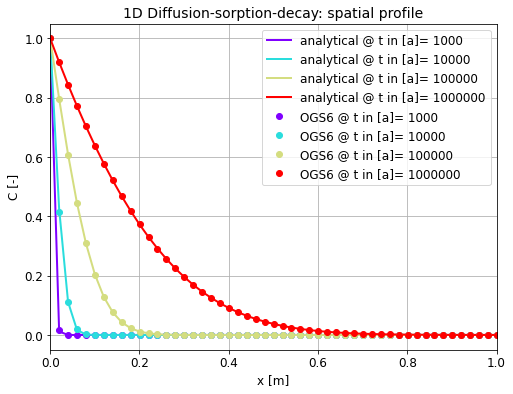

In [65]:
import vtuIO
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from scipy import special

print("=====================")
print(">>> print results <<<")

#Parameters
C0=1
D=1e-11
rho=2394 #kg/m3
Kd=0.5
# Kd=0
porosity=0.12
R=1+(rho*Kd/porosity)
# R = 1 + Kd
print('R:',R)
t12=2.3e+6 * 365*86400 #in seconds
L=20
td=L*L*R/D
print('td:',td)
print('td/t12:',td/t12)
l=np.log(2)/t12
print('lambda:', l)
la=np.absolute(l)
#Time
years = [1000, 10000, 100000, 1000000]
#Geometry
N=1000;x0=0.;xN=20;
x=np.linspace(x0,xN,N)
#Analytical solution
A=np.sqrt(la*R/D)
print('A:',A)

plt.style.use('../notebook.mplstyle')
color1=iter(cm.rainbow(np.linspace(0,1,len(years))))

#plot analytical solution
for t, color in zip(years, color1):
	ts=t*365*86400
	print('ts/td:',ts/td)
	B=C0/2*np.sqrt(R/D/ts)
	#B=0.5*np.sqrt(R/D/T)
	print('B:',B)
	C=np.sqrt(la*ts)
	print('C:',C)
	uexc=C0/2*(np.exp(-x*A)*special.erfc(x*B-C) + np.exp(x*A)*special.erfc(x*B+C))
	plt.plot(x,uexc,label="analytical @ t in [a]= "+str(t), color=color, linestyle = '-')

pvdfile=vtuIO.PVDIO("outDiffusionDecay.pvd", dim=1)
xaxis =  [(i,0,0) for i in np.linspace(start=0.0, stop=20, num=N)]
r_x = np.array(xaxis)[:,0]
time = [i*365*24*3600 for i in years]
color2=iter(cm.rainbow(np.linspace(0,1,len(years))))

for t, color in zip(time, color2):
    function_xaxis_t = pvdfile.read_point_set_data(t, 'C', pointsetarray=xaxis)
    plt.plot(r_x, function_xaxis_t, label='OGS6 @ t in [a]= {}'.format(int(t/3600/24/365)), 
	color=color, marker='o', markevery=1, linestyle="")

titlestring="1D Diffusion-sorption-decay: spatial profile"
plt.title(titlestring)
plt.xlim(0,1)
plt.xlabel('x [m]')
plt.ylabel('C [-]')
plt.legend()
plt.grid()
plt.show()

In [66]:
import time
print(time.ctime())

Tue Aug 24 13:34:42 2021


**OGS links**
- notebook draft by OK: https://github.com/OlafKolditz/ogs-jupyter-lab

**Credits**
- Nagra: NTB 02-06: The reference case as well as the analytical framework was provided in this report
- OK and Jaime Garibay-Rodriguez for this benchmark set up
- Jörg Buchwald for ogs6py and VTUInterface (https://joss.theoj.org/papers/6ddcac13634c6373e6e808952fdf4abc)
- Frameworks acknowledgements: OGS, Python, Jupyter, matplotlib